## NOWCASTING APRIL USING LINEAR REGRESSION
* This approach assumes that Zindi has released the cpi data whhich happens approximately 24th of each month


In [1]:
#this is just for getting the file paths if you have them, no need to do this
!git clone https://github.com/koleshjr/Koding_With_Kolesh.git


Cloning into 'Koding_With_Kolesh'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 24 (delta 5), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (24/24), 14.41 KiB | 2.06 MiB/s, done.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math


from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000


path = '/content/Koding_With_Kolesh/challenges/RMB_NOWCAST_APRIL/'
cpi = pd.read_csv(path + 'CPI_Historic_Values_Zindi_Mar_23.csv')
vehicles = pd.read_csv(path + 'Naamsa_Vehicle_Sales.csv')

In [3]:
cpi.head()

,Month,Category,Value,Percentage Change (From Prior Month)
0,31-03-2023,Headline_CPI,109.0,1.0
1,31-03-2023,Food and non-alcoholic beverages,116.7,1.0
2,31-03-2023,Alcoholic beverages and tobacco,109.2,2.2
3,31-03-2023,Clothing and footwear,103.4,-0.1
4,31-03-2023,Housing and utilities,104.5,0.4


In [4]:
cpi_pivot = cpi.pivot(index = 'Month', columns = 'Category', values = 'Value').reset_index()#changing from a long format to a wide format,
cpi_pivot['Month'] = pd.to_datetime(cpi_pivot['Month'])
cpi_pivot = cpi_pivot.sort_values("Month").reset_index(drop=True)
cpi_pivot


Category,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


### Simple EDA


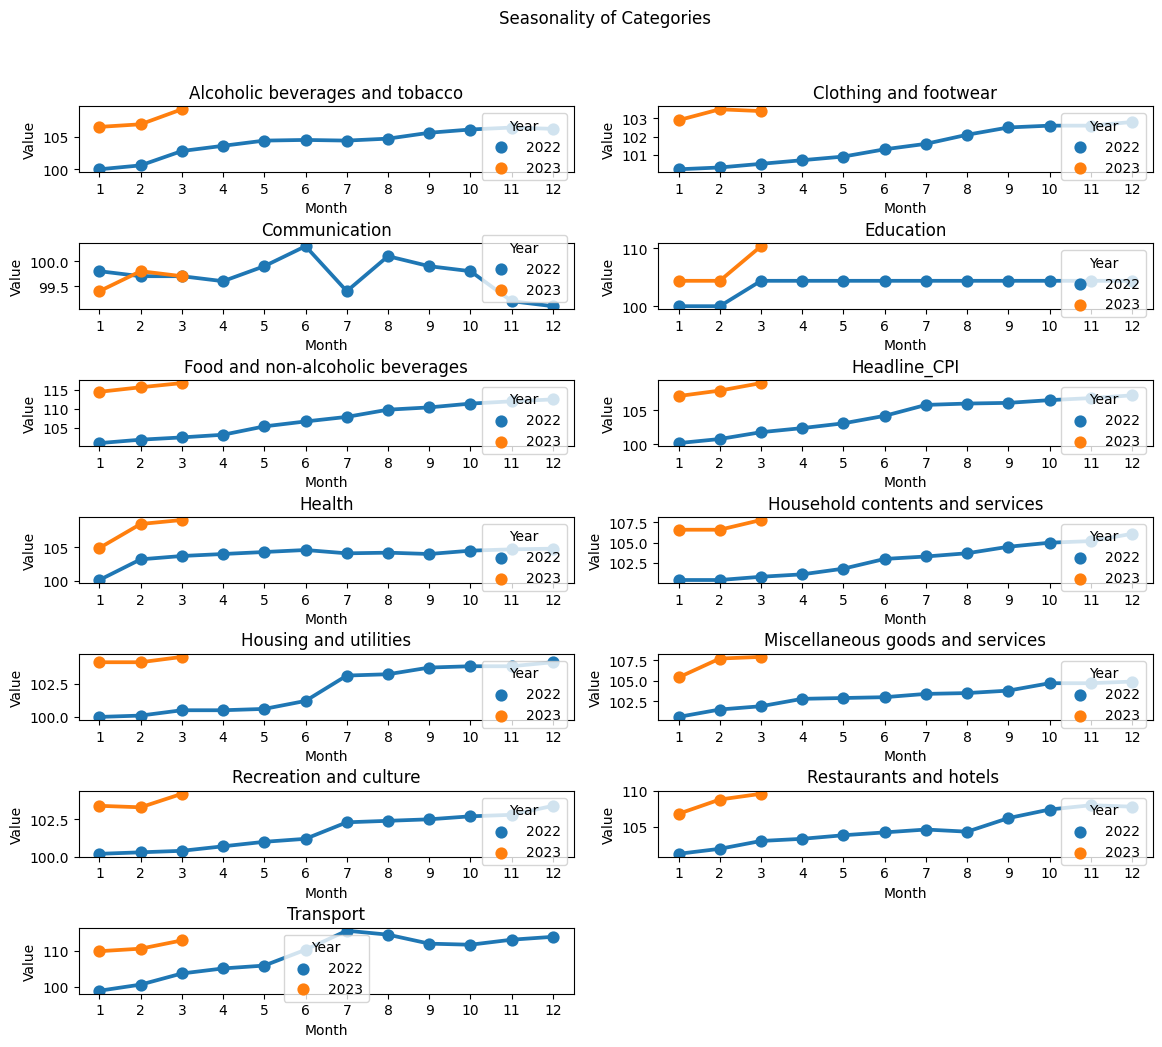

In [5]:


# Create a temporary dataframe with Month and Year columns
df_temp = cpi_pivot.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp['Month']).year
df_temp['Month'] = pd.DatetimeIndex(df_temp['Month']).month

# Define the categories to plot
categories_to_plot = cpi_pivot.columns[1:]

# Create subplots
num_categories = len(categories_to_plot)
num_rows = math.ceil(num_categories / 2)
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))
fig.tight_layout(pad=3.0)

# Iterate over each category and plot its seasonality
for i, category in enumerate(categories_to_plot):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]

    sns.pointplot(x='Month', y=category, hue='Year', data=df_temp, ax=ax)
    ax.set_title(category)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Hide any unused subplots
for i in range(num_categories, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols

    ax = axs[row, col] if num_rows > 1 else axs[col]
    ax.axis('off')

plt.suptitle('Seasonality of Categories', y=1.05)
plt.show()


### Add a row for April
* so this is one of the things that keeps on changing across mini challenge: just the date_str

In [6]:
date_str = '2023-04-30'
date_obj = pd.to_datetime(date_str)
new_row = pd.DataFrame({'Month': [date_obj]})
cpi_pivot = pd.concat([cpi_pivot, new_row]).reset_index(drop=True)
cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9
1,2022-02-28,100.6,100.3,99.7,100.0,101.8,100.8,103.2,100.4,100.1,101.5,100.3,101.9,100.6
2,2022-03-31,102.8,100.5,99.7,104.4,102.4,101.8,103.7,100.8,100.5,101.9,100.4,103.0,103.7
3,2022-04-30,103.6,100.7,99.6,104.4,103.1,102.4,104.0,101.1,100.5,102.8,100.7,103.3,105.1
4,2022-05-31,104.4,100.9,99.9,104.4,105.3,103.1,104.3,101.8,100.6,102.9,101.0,103.8,105.9
5,2022-06-30,104.5,101.3,100.3,104.4,106.6,104.2,104.6,103.0,101.2,103.0,101.2,104.2,110.3
6,2022-07-31,104.4,101.6,99.4,104.4,107.8,105.8,104.1,103.3,103.1,103.4,102.3,104.6,115.6
7,2022-08-31,104.7,102.1,100.1,104.4,109.7,106.0,104.2,103.7,103.2,103.5,102.4,104.3,114.5
8,2022-09-30,105.6,102.5,99.9,104.4,110.3,106.1,104.0,104.5,103.7,103.8,102.5,106.2,112.0
9,2022-10-31,106.1,102.6,99.8,104.4,111.3,106.5,104.5,105.0,103.8,104.7,102.7,107.4,111.7


### Additional data source

* Vehicles

In [7]:
import datetime
cpi_pivot['year_month'] = pd.to_datetime(cpi_pivot['Month'], format='%Y-%b').dt.strftime('%Y-%m')
start_date = datetime.datetime.strptime("2020-12-31", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2023-03-31", "%Y-%m-%d")

# difference between each date. M means one month end
D = 'M'

date_list = pd.date_range(start_date, end_date, freq=D)[::-1]
vehicles['Date'] = date_list
vehicles['Date'] = pd.to_datetime(vehicles['Date'], format='%Y-%b-%d')
vehicles['year_month'] = pd.to_datetime(vehicles['Date'], format='%Y-%b').dt.strftime('%Y-%m')

cpi_pivot = cpi_pivot.merge(vehicles[['year_month', 'Total_Local Sales', 'Total_Export_Sales']], on='year_month', how='left')



* Indices

* Currencies

* Additional data source from the links provided:

### Feature Engineering

In time series feature engineering, "lagging" means looking at past values of a variable (such as temperature, sales, or stock prices) to understand its patterns or make predictions. By creating lagged features, you can include information from previous time points in your analysis. This can help you find trends, detect patterns, or forecast what might happen in the future based on what happened in the past.

* Find your sweet spot


In [8]:
feats_to_lag = [col for col in cpi_pivot.columns if col not in ['Month', 'year_month']]
for col in feats_to_lag:
  for i in range(1, 8):
    cpi_pivot[f"prev_{i}_month_{col}"]= cpi_pivot[col].shift(i)

cpi_pivot

,Month,Alcoholic beverages and tobacco,Clothing and footwear,Communication,Education,Food and non-alcoholic beverages,Headline_CPI,Health,Household contents and services,Housing and utilities,Miscellaneous goods and services,Recreation and culture,Restaurants and hotels,Transport,year_month,Total_Local Sales,Total_Export_Sales,prev_1_month_Alcoholic beverages and tobacco,prev_2_month_Alcoholic beverages and tobacco,prev_3_month_Alcoholic beverages and tobacco,prev_4_month_Alcoholic beverages and tobacco,prev_5_month_Alcoholic beverages and tobacco,prev_6_month_Alcoholic beverages and tobacco,prev_7_month_Alcoholic beverages and tobacco,prev_1_month_Clothing and footwear,prev_2_month_Clothing and footwear,prev_3_month_Clothing and footwear,prev_4_month_Clothing and footwear,prev_5_month_Clothing and footwear,prev_6_month_Clothing and footwear,prev_7_month_Clothing and footwear,prev_1_month_Communication,prev_2_month_Communication,prev_3_month_Communication,prev_4_month_Communication,prev_5_month_Communication,prev_6_month_Communication,prev_7_month_Communication,prev_1_month_Education,prev_2_month_Education,prev_3_month_Education,prev_4_month_Education,prev_5_month_Education,prev_6_month_Education,prev_7_month_Education,prev_1_month_Food and non-alcoholic beverages,prev_2_month_Food and non-alcoholic beverages,prev_3_month_Food and non-alcoholic beverages,prev_4_month_Food and non-alcoholic beverages,prev_5_month_Food and non-alcoholic beverages,prev_6_month_Food and non-alcoholic beverages,prev_7_month_Food and non-alcoholic beverages,prev_1_month_Headline_CPI,prev_2_month_Headline_CPI,prev_3_month_Headline_CPI,prev_4_month_Headline_CPI,prev_5_month_Headline_CPI,prev_6_month_Headline_CPI,prev_7_month_Headline_CPI,prev_1_month_Health,prev_2_month_Health,prev_3_month_Health,prev_4_month_Health,prev_5_month_Health,prev_6_month_Health,prev_7_month_Health,prev_1_month_Household contents and services,prev_2_month_Household contents and services,prev_3_month_Household contents and services,prev_4_month_Household contents and services,prev_5_month_Household contents and services,prev_6_month_Household contents and services,prev_7_month_Household contents and services,prev_1_month_Housing and utilities,prev_2_month_Housing and utilities,prev_3_month_Housing and utilities,prev_4_month_Housing and utilities,prev_5_month_Housing and utilities,prev_6_month_Housing and utilities,prev_7_month_Housing and utilities,prev_1_month_Miscellaneous goods and services,prev_2_month_Miscellaneous goods and services,prev_3_month_Miscellaneous goods and services,prev_4_month_Miscellaneous goods and services,prev_5_month_Miscellaneous goods and services,prev_6_month_Miscellaneous goods and services,prev_7_month_Miscellaneous goods and services,prev_1_month_Recreation and culture,prev_2_month_Recreation and culture,prev_3_month_Recreation and culture,prev_4_month_Recreation and culture,prev_5_month_Recreation and culture,prev_6_month_Recreation and culture,prev_7_month_Recreation and culture,prev_1_month_Restaurants and hotels,prev_2_month_Restaurants and hotels,prev_3_month_Restaurants and hotels,prev_4_month_Restaurants and hotels,prev_5_month_Restaurants and hotels,prev_6_month_Restaurants and hotels,prev_7_month_Restaurants and hotels,prev_1_month_Transport,prev_2_month_Transport,prev_3_month_Transport,prev_4_month_Transport,prev_5_month_Transport,prev_6_month_Transport,prev_7_month_Transport,prev_1_month_Total_Local Sales,prev_2_month_Total_Local Sales,prev_3_month_Total_Local Sales,prev_4_month_Total_Local Sales,prev_5_month_Total_Local Sales,prev_6_month_Total_Local Sales,prev_7_month_Total_Local Sales,prev_1_month_Total_Export_Sales,prev_2_month_Total_Export_Sales,prev_3_month_Total_Export_Sales,prev_4_month_Total_Export_Sales,prev_5_month_Total_Export_Sales,prev_6_month_Total_Export_Sales,prev_7_month_Total_Export_Sales
0,2022-01-31,100.0,100.2,99.8,100.0,100.9,100.2,100.1,100.4,100.0,100.6,100.2,101.2,98.9,2022-01,41382.0,19089.0,NaN,NaN,NaN,NaN,

In [9]:
cpi_pivot = cpi_pivot.drop(0)
cpi_pivot = cpi_pivot.bfill()

In [10]:
train = cpi_pivot[cpi_pivot['Month'] != '2023-04-30']
test = cpi_pivot[cpi_pivot['Month'] == '2023-04-30']

training_set = train[train['Month']!= '2023-03-31']
validation_set = train[train['Month']== '2023-03-31']

train.shape, test.shape, training_set.shape, validation_set.shape

((14, 122), (1, 122), (13, 122), (1, 122))

### Training and Validation

In [11]:
target_cols = ['Alcoholic beverages and tobacco', 'Clothing and footwear',
       'Communication', 'Education', 'Food and non-alcoholic beverages',
       'Headline_CPI', 'Health', 'Household contents and services',
       'Housing and utilities', 'Miscellaneous goods and services',
       'Recreation and culture', 'Restaurants and hotels ', 'Transport']

#if you add additional data sources that have no value in the predicting month , drop it, now that you have their lags
features= [col for col in train.columns if col not in target_cols + ['Month', 'year_month','Total_Local Sales', 'Total_Export_Sales']]


X_train = training_set[features]
y_train = training_set[target_cols]

X_val = validation_set[features]
y_val = validation_set[target_cols]


lr_models = {}
y_pred = []
scaler = MinMaxScaler()

#training
for target_col in target_cols:
  lr_model = LinearRegression()
  X_train_scaled = scaler.fit_transform(X_train)
  lr_model.fit(X_train_scaled, y_train[target_col])
  lr_models[target_col] = lr_model

#validation

for target_col in target_cols:
  lr_model = lr_models[target_col]
  X_val_scaled = scaler.transform(X_val)
  y_pred_col = lr_model.predict(X_val_scaled)
  y_pred.append(y_pred_col)


#scoring

y_pred = np.array(y_pred).T

df = pd.DataFrame({'y_pred': y_pred.flatten(), 'y_val': y_val.values.flatten()})

#calculate the rmse
rmse = np.sqrt(mean_squared_error(df['y_pred'], df['y_val']))

print(f'RMSE: {rmse}')







RMSE: 0.717005774362851


### Training and Inference

In [12]:

X_train = train[features]
y_train = train[target_cols]

X_val = test[features]
y_val = test[target_cols]


lr_models = {}
y_pred = []
scaler = MinMaxScaler()

#training
for target_col in target_cols:
  lr_model = LinearRegression()
  X_train_scaled = scaler.fit_transform(X_train)
  lr_model.fit(X_train_scaled, y_train[target_col])
  lr_models[target_col] = lr_model

#validation

for target_col in target_cols:
  lr_model = lr_models[target_col]
  X_val_scaled = scaler.transform(X_val)
  y_pred_col = lr_model.predict(X_val_scaled)
  y_pred.append(y_pred_col)

y_pred = np.array(y_pred).T


### Prepare the Submission

In [13]:
def prepSub(y_pred: list, target_cols: list, test: pd.DataFrame, prefix: str) -> pd.DataFrame:
    # Create a submission DataFrame
    submission_df = pd.DataFrame(y_pred, columns=target_cols)

    # Add the month column to the submission DataFrame
    submission_df['Month'] = test['Month']

    # Set the month column as the index
    submission_df.set_index('Month', inplace=True)

    # Add the prefix to the column names
    # Add the prefix to the column names
    submission_df.columns = [prefix + '_' + col.lower().replace('_', ' ').strip() for col in submission_df.columns]
    submission_df = submission_df.rename(columns = {f'{prefix}_headline cpi': f'{prefix}_headline CPI'})


    # Reshape the DataFrame using pd.melt()
    submission_df = pd.melt(submission_df.reset_index(), id_vars=['Month'], var_name='ID', value_name='Value')


    return submission_df[['ID', 'Value']]

#also the prefix here changes across mini challenges
submission = prepSub(y_pred, target_cols, test, 'April')
submission


,ID,Value
0,April_alcoholic beverages and tobacco,110.128831
1,April_clothing and footwear,103.841184
2,April_communication,99.681132
3,April_education,109.955976
4,April_food and non-alcoholic beverages,118.025666
5,April_headline CPI,109.739664
6,April_health,109.955843
7,April_household contents and services,108.133332
8,April_housing and utilities,104.557716
9,April_miscellaneous goods and services,109.400848


In [14]:
submission.to_csv("April_5.csv", index = False)